### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [8]:
target = boston.target

In [9]:
feature_names = boston.feature_names

In [10]:
X = pd.DataFrame(data, columns=feature_names)
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [11]:
y = pd.DataFrame(target, columns=['price'])
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [18]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [19]:
X_train_scaled.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
5,-0.385519,-0.500320,-0.523527,-0.278089,-0.540021,0.162452,-1.926178,0.755292,-0.507797,-0.705154,0.575794,0.408971,-1.038833
6,-0.402695,-0.500320,-0.841560,-0.278089,-0.352880,-0.393595,-1.218030,1.022793,-0.507797,-1.084748,0.845343,0.444180,-0.626249
7,-0.404845,3.175545,-1.487791,-0.278089,-1.246051,0.094710,-1.175112,2.527219,-0.857485,-0.548496,-0.457477,0.444180,-0.941672
8,1.305053,-0.500320,1.033237,-0.278089,1.561057,-0.231297,1.124581,-0.889790,1.706891,1.578434,0.845343,-3.793837,1.970358
9,1.221694,-0.500320,1.033237,-0.278089,0.344643,0.756603,1.124581,-1.100587,1.706891,1.578434,0.845343,-1.934525,1.031130


In [21]:
from sklearn.manifold import TSNE

In [24]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [25]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [26]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

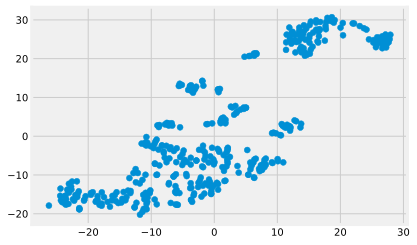

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [37]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [43]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [44]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

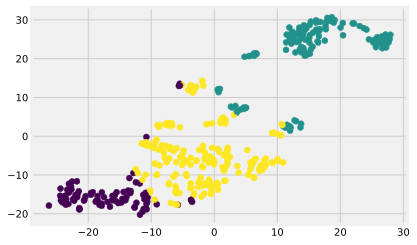

In [45]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [46]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [47]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [49]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [50]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [51]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [52]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367